## 1. Import libraries and load the dataset

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pmdarima as pmd
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [26]:
# Load the dataset
df = pd.read_csv("./USDT.csv")

df = df[['Price']]
df = df.dropna()
df = df.reset_index(drop=True)

df

,Price
0,0.9999
1,0.9993
2,0.9998
3,0.9999
4,1.0000
...,...
2018,1.0000
2019,1.0000
2020,0.9977
2021,0.9959


## 2. Split the data into training, test and validate sets

In [27]:
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1213, 1)
Test shape: (606, 1)
Validate shape: (204, 1)


In [28]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1416, 1)
Test shape: (404, 1)
Validate shape: (203, 1)


In [29]:
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1213, 1)
Test shape: (404, 1)
Validate shape: (406, 1)


## 3. Perform Linear Regression Model 

### 3.1 Build and fit Linear Regression Model

In [30]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [31]:
def evaluate_lr_model(x_data, y_data):
    y_pred = model.predict(x_data)
    mse = mean_squared_error(y_data, y_pred)
    mae = mean_absolute_error(y_data, y_pred)
    mape = mean_absolute_percentage_error(y_data, y_pred)
    rmse = mean_squared_error(y_data, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

### 3.2 Evaluate on Validate data

In [32]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred_test, test_mse, test_mae, test_mape, test_rmse = evaluate_lr_model(x_test, y_test)

### 3.3 Evaluate on Test data

In [33]:
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val, val_mse, val_mae, val_mape, val_rmse =  evaluate_lr_model(x_val, y_val)

### 3.4 Predict price for the next 30 days

In [34]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1.00232557 1.00232686 1.00232815 1.00232944 1.00233072 1.00233201
 1.0023333  1.00233459 1.00233588 1.00233717 1.00233846 1.00233975
 1.00234104 1.00234232 1.00234361 1.0023449  1.00234619 1.00234748
 1.00234877 1.00235006 1.00235135 1.00235264 1.00235392 1.00235521
 1.0023565  1.00235779 1.00235908 1.00236037 1.00236166 1.00236295]


In [35]:
metrics = {
    'MSE': [val_mse, test_mse],
    'MAE': [val_mae, test_mae],
    'MAPE': [val_mape, test_mape],
    'RMSE': [val_rmse, test_rmse],
}

acc = pd.DataFrame(metrics, index=['Validate', 'Test'])

print(acc)

               MSE       MAE      MAPE      RMSE
Validate  0.000124  0.006883  0.006959  0.011152
Test      0.000027  0.003563  0.003557  0.005188


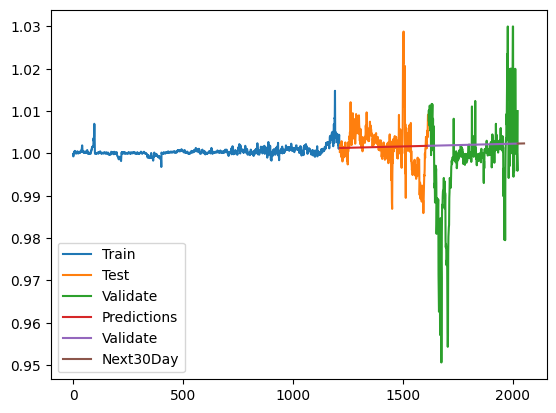

In [36]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred_test)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions','Validate','Next30Day'])
plt.show()